## <center>DPL Match Winner Prediction</center>

---

# **Table of Contents**

---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>

  - **4.1** [**Data Acquisition**](#Section41)
  - **4.2** [**Data Description**](#Section42)
  - **4.3** [**Data Information**](#Section43)

5. [**Data Pre-Processing**](#Section5)<br>
 
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Handling of Redundant Data**](#Section52)

6. [**Exploratory Data Analysis**](#Section6)<br>


7. [**Train Test Split**](#Section8)<br>

8. [**Logistic Regression**](#Section8)<br>

9. [**Decision Tree**](#Section9)<br>

10. [**Random Forest Classifier**](#Section10)<br>

11. [**Randomized Search CV**](#Section11)<br>

12. [**K-Neighbour Classifier**](#Section12)<br>

13. [**Naive Bayes**](#Section13)<br>

14. [**AUC and RUC Model Evaluation**](#Section14)<br>

15. [**Analysis on Unseen Data**](#Section15)<br>

16. [**Random Forest on Unseen Data**](#Section16)<br>

17. [**Model Evauation on Unseen Data**](#Section17)<br>

---

---
<a name = Section1></a>
# **1. Introduction**
---


- The client for this project is One-shot Association.
- INSAID Corp is an Indian analytics company.
- Established in 2018, it is one of the top analytics companies in India.
- They provide regular maintenance for their clients and customers which enables them to make their products more robust and their services promote longevity.
- With a recent project requirement from One-shot Association, the official partners of DPL, INSAID Corp has boarded a project that requires making an automatic system that can predict the winner of the Data Premier League

---
<a name = Section2></a>
# **2. Problem Statement**
---

-  The task is to build a multi-label classification model using the dataset.
-  We need to build the best possible model.





---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---


- This section is emphasised on installing and importing the necessary libraries that will be required.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')     # To suppress all the warnings in the notebook.
import seaborn as sns

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- We are given the **Train Set**.

- The Train Set parameters are,

|Id|Parameter Name|Description|
|:--|:--|:--|
|01 | id	               | Unique identifier |
|02 | netural_venue        | Venue of the game. stadium 1: 0 and stadium 2: 1|
|03 | team1                | Team 1 Encoded as Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3|
|04 | team2                | Team 2 Encoded as Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3 |
|05 | toss_winner          | Winner of the toss. Assuming Team is Encoded as Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3 |
|06 | toss_decision        | Decision made by toss winning captain.  0 as Fielding and 1 as Batting | 
|07 | result_margin        | By How many runs the winning team won the match  |
|08 | Day of week            | The day of the week encoded as Sunday:1, Monday:2, Tuesday:3, Wednesday:4, Thursday:5, Friday:6, Saturday:7 |
|09 | Day of the month     | The day of the month |
|10 | Month                | The month of the record. |
|11 | Year                 | The year of the record |
|12 | winner               | The winner of the match|


<a name = Section41></a>
### 4.1 Data Acquisition


 

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/naveenmnav/INSAID-DPL-2022/main/Training_Data.csv")

In [3]:
dataset['toss_winner'].unique()

array([1, 0, 3, 2], dtype=int64)

<a name = Section42></a>
### 4.2 Data Description


 

In [4]:
dataset.describe(include='all')

,id,neutral_venue,team1,team2,toss_winner,toss_decision,result_margin,Day_of_Week,Day_of_month,Month,Year,winner
count,6.520000e+02,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,7.552707e+05,0.087423,0.628834,0.656442,0.650307,0.406442,17.120457,3.987730,15.604294,4.814417,2013.920245,0.579755
std,3.059656e+05,0.282671,0.722874,0.736416,0.739774,0.491546,21.579157,2.198974,8.205119,1.556190,3.661535,0.712897
min,3.359820e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2008.000000,0.000000
25%,5.012205e+05,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,9.000000,4.000000,2011.000000,0.000000
50%,7.292930e+05,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000,4.000000,16.000000,5.000000,2014.000000,0.000000
75%,1.082627e+06,0.000000,1.000000,1.000000,1.000000,1.000000,19.000000,6.000000,22.000000,5.000000,2017.000000,1.000000
max,1.237181e+06,1.000000,3.000000,3.000000,3.000000,1.000000,146.000000,7.000000,31.000000,11.000000,2020.000000,3.000000


<a name = Section43></a>
### **4.3 Data Information**

- In this section we will see the **information about the types of features**.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             652 non-null    int64  
 1   neutral_venue  652 non-null    int64  
 2   team1          652 non-null    int64  
 3   team2          652 non-null    int64  
 4   toss_winner    652 non-null    int64  
 5   toss_decision  652 non-null    int64  
 6   result_margin  652 non-null    float64
 7   Day_of_Week    652 non-null    int64  
 8   Day_of_month   652 non-null    int64  
 9   Month          652 non-null    int64  
 10  Year           652 non-null    int64  
 11  winner         652 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 61.2 KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1  Handling of Redundant Data**

- In this section, we will see if any redundant data are present in the dataset.

In [6]:
print('Has the Dataset cointains any Duplicate/ Redundant values ?  ',dataset.duplicated().any())

Has the Dataset cointains any Duplicate/ Redundant values ?   False


<a name = Section52></a>
### **5.2  Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [7]:
null_frame = pd.DataFrame(index = dataset.columns.values)
null_frame['Null Frequency'] = dataset.isnull().sum().values
percent = dataset.isnull().sum().values/dataset.shape[0]
null_frame['Missing Percentage'] = np.round(percent, decimals = 4) * 100
null_frame

,Null Frequency,Missing Percentage
id,0,0.0
neutral_venue,0,0.0
team1,0,0.0
team2,0,0.0
toss_winner,0,0.0
toss_decision,0,0.0
result_margin,0,0.0
Day_of_Week,0,0.0
Day_of_month,0,0.0
Month,0,0.0


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

<a name = Section61></a>
**<h4>Question:** Which team has won the most tosses?</h4>

In [8]:
dataset[['toss_winner']].value_counts()

toss_winner
0              311
1              279
2               41
3               21
dtype: int64

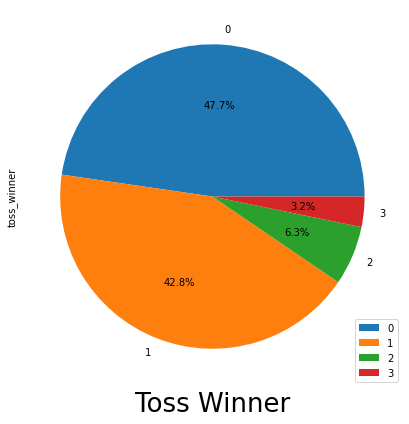

In [9]:
fig = plt.figure(figsize = (15,7))

dataset['toss_winner'].value_counts().plot(kind = 'pie', autopct = '%3.1f%%', legend = True)

plt.xlabel('Toss Winner' ,fontsize=26)

plt.show()

**Observations**

- Team 0 which is **Kolkata Superstars** have won the most tosses(311) in the tournament followed by Team 1 which is **Chennai Strikers**(279)

- Mumbai Lords have been the unluckiest team in terms of winning the toss(21)

<a name = Section62></a>
**<h4>Question:**What was the decision taken by the toss winning captain?</h4>

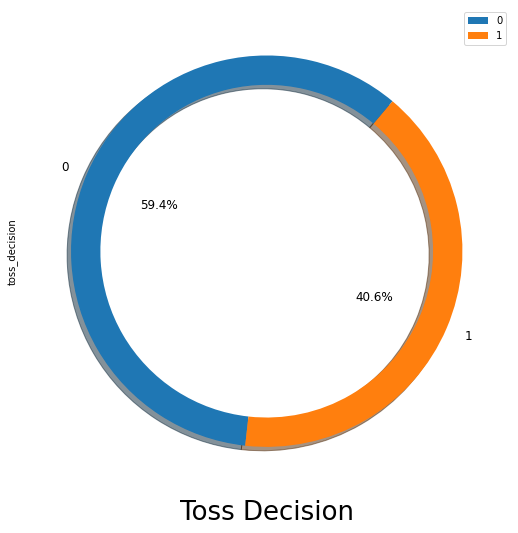

In [10]:
fig = plt.figure(figsize=(15, 7))

fuel_df = dataset['toss_decision'].value_counts().plot(kind = 'pie',  autopct='%3.1f%%',figsize=(9, 9), wedgeprops=dict(width=0.15),fontsize=12, startangle=50 , shadow=True,legend=True)
plt.xlabel(xlabel='Toss Decision', fontsize=26)

plt.show()

In [11]:
dataset['toss_decision'].value_counts()

0    387
1    265
Name: toss_decision, dtype: int64

**Observations:**

- we can see when a captain wins the toss, 59.4% of the times, they are fielding first

<a name = Section63></a>
**<h4>Question:** What is the relationship between the toss and the match result?</h4>

In [12]:
df_plot = dataset.groupby(['toss_decision', 'winner']).size().reset_index().pivot(columns='toss_decision', index='winner', values=0)

df_plot

toss_decision,0,1
winner,,
0.0,193,149
1.0,158,102
2.0,19,13
3.0,17,1


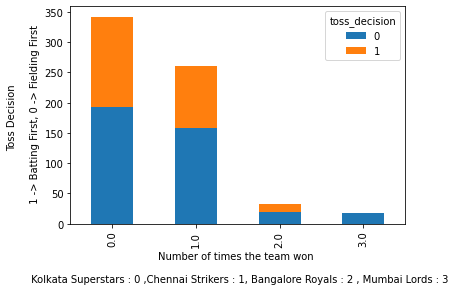

In [13]:
df_plot.plot(kind='bar', stacked=True)
plt.xlabel("Number of times the team won \n\n Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3") 
plt.ylabel("Toss Decision \n\n 1 -> Batting First, 0 -> Fielding First")
plt.show()

**Observation**
- Kolkata Superstars have won more matches after they have won the toss and decided to field first. Also, they have won more matches batting first than the other teams which shows how much consistent they are.

- Mumbai Indians have been the weakest team among the others 

<a name = Section64></a>
**<h4>Question:** What is the relationship between the run margin and the winning team?</h4>

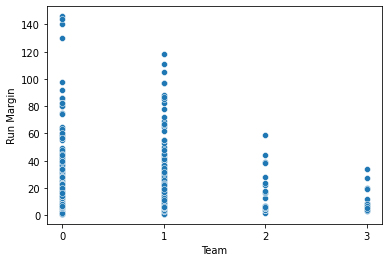

In [14]:
sns.scatterplot(x ='winner', y ='result_margin', data = dataset)
plt.xlabel("Team")
plt.xticks([0,1,2,3])
plt.ylabel("Run Margin")
plt.show()

**Observations**

- Kolkata has won matches with the biggest run margin when compared to the others

<a name = Section65></a>
**<h4>Question:** What is the relationship between the day of the match and the run margin?</h4>

<Figure size 1080x504 with 0 Axes>

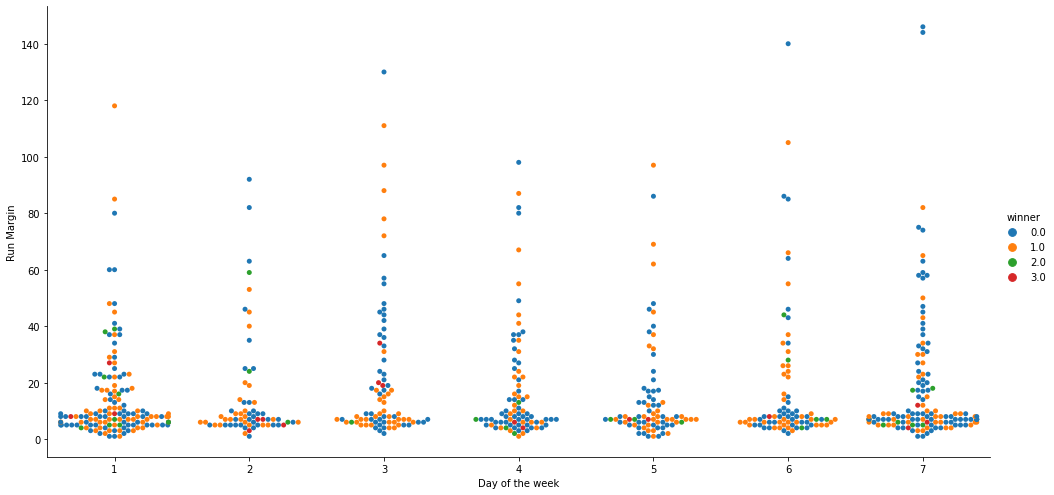

In [15]:

fig = plt.figure(figsize = (15,7))
sns.catplot(x="Day_of_Week", y="result_margin", hue = "winner",kind = 'swarm',data=dataset,height=7, aspect=2);
plt.xlabel("Day of the week")
plt.ylabel("Run Margin")
plt.show()

**Observation**

- We can observe Kolkata and Chennai have consistently performed in all days of the week irrespective of the Year of tournament

- Kolkata have scored well in the Weekends where they have had more 100+ runs margin than other teams

<a name = Section66></a>
**<h4>Question:** What is the relationship between the year and the number of wins of each team?</h4>

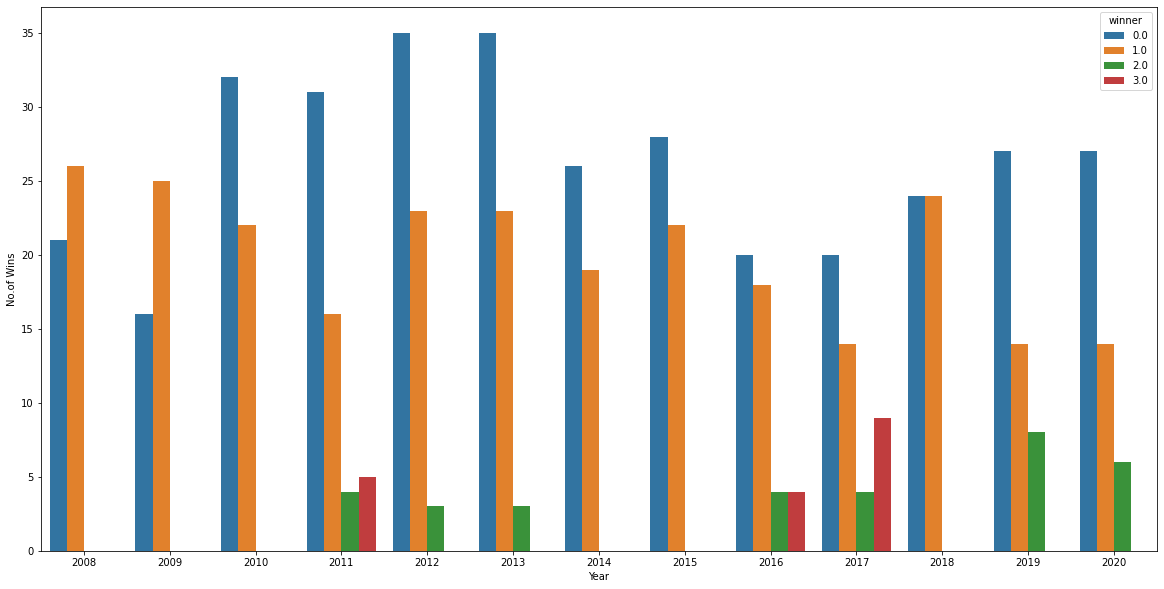

In [16]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x ='Year', hue = "winner",data = dataset)
plt.xlabel("Year")

plt.ylabel("No.of Wins")
plt.show()

**Observations:**
- The DPL tournament began in 2008 and we have data till 2020.

- We can see Chennai and Kolkata have clearly outperformed the other 2 teams throughout the years

- Mumbai and Bengaluru have not won a single game in 2008, 2009, 2010, 2014, 2015, 2018.

<a name = Section67></a>
**<h4>Question:** How is the ground and the team victory related?</h4>

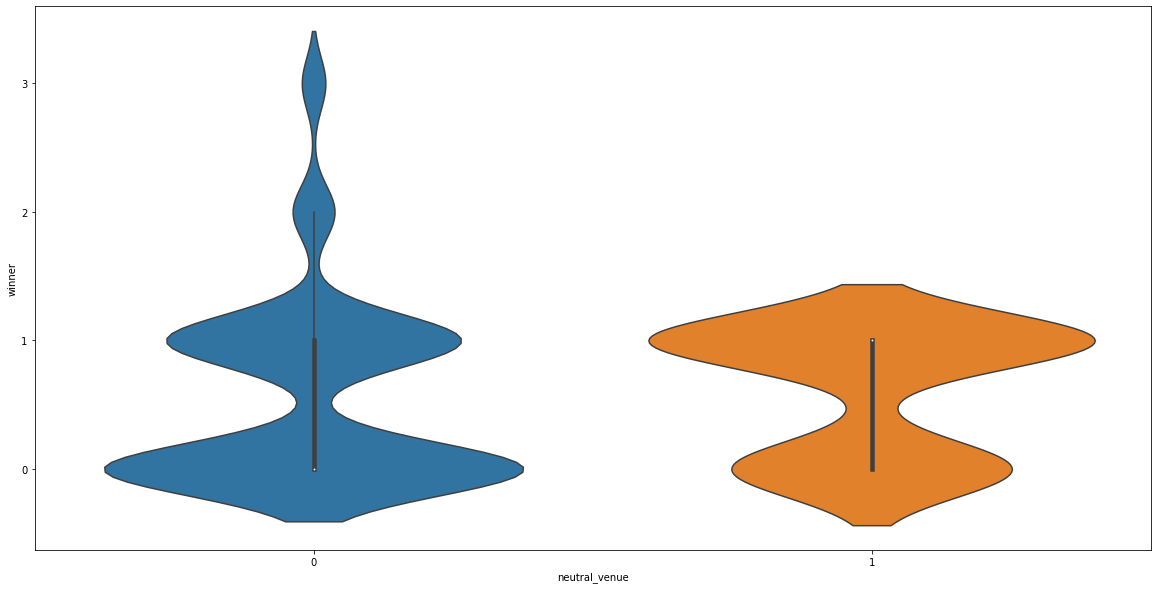

In [17]:
fig = plt.figure(figsize = (20,10))
ax = sns.violinplot(x="neutral_venue", y="winner", data=dataset)
plt.yticks([0,1,2,3])
plt.show()

**Observations :**

- We can infer that Kolkata and Chennai have more than Mumbai and Bengaluru in Venue 0

- Only Chennai and Kolkata have won in Venue 1 which shows there's no ground advantage for Mumbai and Bengaluru in Venue 1

- Chennai have won more matches in Venue 1 that Kolkata

<a name = Section68></a>
**<h4>Question:** How is the month of the match and team victory related?</h4>

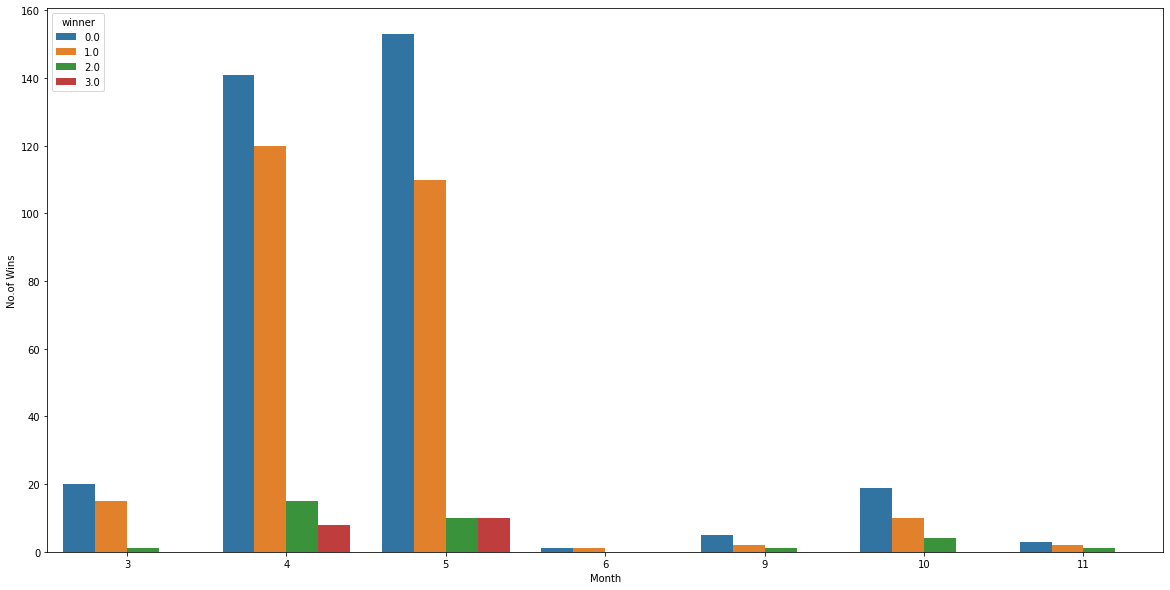

In [18]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x ='Month', hue = "winner",data = dataset)
plt.xlabel("Month")

plt.ylabel("No.of Wins")
plt.show()

In [19]:
dataset[['Year','Month']].value_counts()

Year  Month
2020  10       33
2012  4        33
2013  4        32
2016  5        32
2008  5        32
2010  4        29
2011  4        29
2013  5        29
2012  5        28
2014  5        28
2017  4        28
2009  5        28
2019  4        28
2011  5        27
2018  5        25
2010  3        25
2015  4        25
      5        25
2018  4        23
2017  5        19
2014  4        16
2008  4        14
2016  4        14
2009  4        13
2019  3        11
      5        10
2020  9         8
      11        6
2008  6         1
2014  6         1
dtype: int64

**Observations:**

- Usually the DPL tournament will happen during the month of April and May. That's where the maximum number of games have been played.

- We can see some matches happening in March, June, September, October and November.

- We can conclude that matches happening in March and June can be due to the early commencement of the tournament for the year and late completion for the year. 

- We can see that in the year 2020, matches happened in September, October and November due to the COVID - 19 Pandemic.

In [20]:
dataset

,id,neutral_venue,team1,team2,toss_winner,toss_decision,result_margin,Day_of_Week,Day_of_month,Month,Year,winner
0,734031,0,0,1,1,0,15.0,6,23,5,2014,0.0
1,598011,0,0,2,0,1,41.0,7,13,4,2013,0.0
2,548354,0,1,1,1,1,43.0,7,5,5,2012,1.0
3,1136609,0,0,1,0,0,6.0,3,15,5,2018,0.0
4,392204,1,0,1,0,1,8.0,6,1,5,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
647,392196,1,0,1,1,0,6.0,2,27,4,2009,1.0
648,392231,1,0,0,0,1,7.0,2,18,5,2009,0.0
649,548328,0,1,0,1,1,8.0,4,18,4,2012,0.0
650,734005,0,0,1,1,0,16.0,3,13,5,2014,0.0


<a name = Section7></a>
## 7. Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [22]:
X_train

,id,neutral_venue,team1,team2,toss_winner,toss_decision,result_margin,Day_of_Week,Day_of_month,Month,Year
380,1216525,0,0,0,0,1,37.0,7,10,10,2020
62,598008,0,0,0,0,0,8.0,5,11,4,2013
388,1082637,0,1,2,2,0,6.0,1,7,5,2017
241,548370,0,0,0,0,0,32.0,4,16,5,2012
638,392212,1,1,0,1,1,19.0,4,6,5,2009
...,...,...,...,...,...,...,...,...,...,...,...
144,1178430,0,1,0,1,0,6.0,1,5,5,2019
645,336002,0,1,0,1,1,5.0,1,25,5,2008
72,392198,1,1,1,1,1,5.0,3,28,4,2009
235,1178422,0,0,0,0,0,34.0,1,28,4,2019


In [23]:
y_train

380    0.0
62     0.0
388    2.0
241    0.0
638    1.0
      ... 
144    1.0
645    0.0
72     1.0
235    0.0
37     1.0
Name: winner, Length: 521, dtype: float64

In [24]:
X_test

,id,neutral_venue,team1,team2,toss_winner,toss_decision,result_margin,Day_of_Week,Day_of_month,Month,Year
465,1175370,0,0,0,0,0,37.0,4,3,4,2019
441,734011,0,1,1,1,0,62.0,5,15,5,2014
593,980995,0,0,0,0,0,9.0,2,16,5,2016
458,829809,0,1,0,1,1,7.0,7,16,5,2015
41,734021,0,1,0,0,1,7.0,3,20,5,2014
...,...,...,...,...,...,...,...,...,...,...,...
195,548344,0,0,0,0,1,47.0,7,28,4,2012
135,829745,0,0,0,0,0,27.0,4,22,4,2015
411,1082602,0,0,0,0,0,4.0,6,14,4,2017
159,980961,0,2,1,1,0,8.0,3,3,5,2016


In [25]:
y_test

465    0.0
441    1.0
593    0.0
458    0.0
41     1.0
      ... 
195    0.0
135    0.0
411    0.0
159    1.0
250    1.0
Name: winner, Length: 131, dtype: float64

<a name = Section8></a>
## 8. Logistic Regression

### We will be using Logistic Regresssion first to check the accuracy

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# logistic regression
model1 = LogisticRegression()


In [28]:
model1.fit(X_train, y_train)


LogisticRegression()

In [29]:
log_preg_train = model1.predict(X_train)

In [30]:
log_pred_test = model1.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,log_pred_test))

Accuracy score for test data is: 0.5954198473282443


In [32]:
print('Accuracy score for Train data is:', accuracy_score(y_train,log_preg_train))

Accuracy score for Train data is: 0.5067178502879078


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        78
         1.0       0.00      0.00      0.00        48
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2

    accuracy                           0.60       131
   macro avg       0.15      0.25      0.19       131
weighted avg       0.35      0.60      0.44       131



In [34]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score :",precision_score(y_test,log_pred_test, average='micro'))
print("Recall Score :",recall_score(y_test,log_pred_test, average = 'micro'))

Precision Score : 0.5954198473282443
Recall Score : 0.5954198473282443


#### We can see the Precision is very low. We can tune our model by adjusting the hyperparameters by using .predict_proba instead of .predict

#### Setting threshold to 0.75

In [35]:
model1.predict_proba(X_test)

array([[0.49070195, 0.33878979, 0.12097819, 0.04953006],
       [0.51977779, 0.41056965, 0.03839477, 0.03125779],
       [0.51031476, 0.37431617, 0.07424688, 0.0411222 ],
       [0.51760752, 0.39771123, 0.04978068, 0.03490057],
       [0.51932491, 0.41092866, 0.03845125, 0.03129518],
       [0.51890488, 0.42798071, 0.02647717, 0.02663725],
       [0.51031108, 0.37433742, 0.07423232, 0.04111919],
       [0.51677984, 0.43919642, 0.02029433, 0.02372941],
       [0.51690117, 0.43907703, 0.02029371, 0.02372809],
       [0.5015051 , 0.35664311, 0.09631621, 0.04553559],
       [0.484479  , 0.3306359 , 0.13358044, 0.05130466],
       [0.49000324, 0.33834371, 0.12196204, 0.049691  ],
       [0.51437177, 0.44803554, 0.0161436 , 0.02144909],
       [0.51095804, 0.45683731, 0.01282352, 0.01938114],
       [0.48445042, 0.33062664, 0.13360996, 0.05131298],
       [0.51096464, 0.45683664, 0.01282097, 0.01937775],
       [0.51450631, 0.44793483, 0.0161272 , 0.02143166],
       [0.51688052, 0.43910016,

In [36]:
model1.predict_proba(X_test)[:, 1]

array([0.33878979, 0.41056965, 0.37431617, 0.39771123, 0.41092866,
       0.42798071, 0.37433742, 0.43919642, 0.43907703, 0.35664311,
       0.3306359 , 0.33834371, 0.44803554, 0.45683731, 0.33062664,
       0.45683664, 0.44793483, 0.43910016, 0.39767002, 0.43893402,
       0.37435171, 0.37412493, 0.33040404, 0.45684131, 0.41093261,
       0.39760772, 0.41093244, 0.33064434, 0.33057338, 0.35657617,
       0.3465087 , 0.33897423, 0.39754073, 0.43918926, 0.43385298,
       0.45096942, 0.44799738, 0.43384201, 0.33062689, 0.43384676,
       0.4109211 , 0.45663666, 0.37431941, 0.43380953, 0.33831219,
       0.39772048, 0.43882918, 0.43375184, 0.33767606, 0.43912575,
       0.37431737, 0.39766274, 0.33892959, 0.35641681, 0.44774342,
       0.42804622, 0.34648663, 0.44809906, 0.4391816 , 0.45684085,
       0.33063391, 0.42802377, 0.43383961, 0.43385863, 0.45681486,
       0.34649261, 0.43919304, 0.33833419, 0.43384847, 0.39770011,
       0.42801037, 0.39772023, 0.33834489, 0.44814068, 0.33060

In [37]:
model1.predict_proba(X_test)[:, 1] > 0.75

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [38]:
log_preds1 = np.where(model1.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,log_preds1))

Accuracy score for test data is: 0.5954198473282443


In [39]:
print("Precision Score :",precision_score(y_test,log_preds1, average='micro'))
print("Recall Score :",recall_score(y_test,log_preds1, average = 'micro'))

Precision Score : 0.5954198473282443
Recall Score : 0.5954198473282443


#### We can see the accuracy score remains the same

#### Setting threshold to 0.25

In [40]:
log_preds2 = np.where(model1.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,log_preds2))

Accuracy score for test data is: 0.366412213740458


In [41]:
print("Precision Score :",precision_score(y_test,log_preds2, average='micro'))
print("Recall Score :",recall_score(y_test,log_preds2, average = 'micro'))

Precision Score : 0.366412213740458
Recall Score : 0.366412213740458


#### We can see the accuracy has come down to 0.36. Hence we can't use Logistic Regression

<a name = Section9></a>
## 9. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
dt_y_pred_train = dt_model.predict(X_train)  

In [44]:
dt_y_pred_test = dt_model.predict(X_test)                                                           

In [45]:
print('Accuracy score for test data is:', accuracy_score(y_test,dt_y_pred_test))

Accuracy score for test data is: 0.7786259541984732


In [46]:
print('Accuracy score for train data is:', accuracy_score(y_train,dt_y_pred_train))

Accuracy score for train data is: 1.0


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        78
         1.0       0.76      0.77      0.76        48
         2.0       0.12      0.33      0.18         3
         3.0       0.40      1.00      0.57         2

    accuracy                           0.78       131
   macro avg       0.54      0.72      0.59       131
weighted avg       0.82      0.78      0.79       131



In [48]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score :",precision_score(y_test,dt_y_pred_test, average='micro'))
print("Recall Score :",recall_score(y_test,dt_y_pred_test, average = 'micro'))

Precision Score : 0.7786259541984732
Recall Score : 0.7786259541984732


#### Setting Threshold to 0.75

In [49]:
dt_preds1 = np.where(dt_model.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,dt_preds1))

Accuracy score for test data is: 0.7938931297709924


#### Setting Threshold to 0.50

In [50]:
dt_preds2 = np.where(dt_model.predict_proba(X_test)[:,1]> 0.50,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,dt_preds2))

Accuracy score for test data is: 0.7938931297709924


In [51]:
print("Precision Score :",precision_score(y_test,dt_preds2, average='micro'))
print("Recall Score :",recall_score(y_test,dt_preds2, average = 'micro'))

Precision Score : 0.7938931297709924
Recall Score : 0.7938931297709924


<a name = Section10></a>
## 10. Random Forest Classifier

In [52]:
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = rf_clf.predict(X_train)
y_test_pred_count = rf_clf.predict(X_test)

In [54]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_test_pred_count))

Accuracy score for test data is: 0.7251908396946565


In [55]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_train_pred_count))

Accuracy score for train data is: 1.0


In [56]:
print(classification_report(y_test,y_test_pred_count))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81        78
         1.0       0.73      0.67      0.70        48
         2.0       0.11      0.33      0.17         3
         3.0       0.00      0.00      0.00         2

    accuracy                           0.73       131
   macro avg       0.41      0.45      0.42       131
weighted avg       0.75      0.73      0.74       131



In [57]:
print("Precision Score :",precision_score(y_test,y_test_pred_count, average='micro'))
print("Recall Score :",recall_score(y_test,y_test_pred_count, average = 'micro'))

Precision Score : 0.7251908396946565
Recall Score : 0.7251908396946565


<a name = Section11></a>

### 11. Randomized Search CV

In [58]:
from scipy.stats import randint as sp_randint
# Parameters for GridSearchCV
# Specify parameters and distributions to sample from


param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

# Run randomized search
random_search = RandomizedSearchCV(estimator=rf_clf, 
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002105B7C9348>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002105B7C9F08>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]})

In [59]:
# Predicting training and testing labels
rscv_y_train_pred_count = random_search.predict(X_train)
rscv_y_test_pred_count = random_search.predict(X_test)

In [60]:
print('Accuracy score for test data is:', accuracy_score(y_test,rscv_y_test_pred_count))

Accuracy score for test data is: 0.6259541984732825


In [61]:
print('Accuracy score for train data is:', accuracy_score(y_train,rscv_y_train_pred_count))

Accuracy score for train data is: 0.746641074856046


In [62]:
print(classification_report(y_test,rscv_y_test_pred_count))

              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72        78
         1.0       0.63      0.56      0.59        48
         2.0       0.18      1.00      0.30         3
         3.0       0.14      0.50      0.22         2

    accuracy                           0.63       131
   macro avg       0.44      0.68      0.46       131
weighted avg       0.71      0.63      0.66       131



In [63]:
print("Precision Score :",precision_score(y_test,rscv_y_test_pred_count, average='micro'))
print("Recall Score :",recall_score(y_test,rscv_y_test_pred_count, average = 'micro'))

Precision Score : 0.6259541984732825
Recall Score : 0.6259541984732825


<a name = Section12></a>
### 12. K-Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knc_clf = KNeighborsClassifier()

knc_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
knc_y_pred_train = knc_clf.predict(X_train)
knc_y_pred_test = knc_clf.predict(X_test)

In [66]:
print('Accuracy score for test data is:', accuracy_score(y_test,knc_y_pred_test))

Accuracy score for test data is: 0.44274809160305345


In [67]:
print('Accuracy score for train data is:', accuracy_score(y_train,knc_y_pred_train))

Accuracy score for train data is: 0.6257197696737045


In [68]:
print(classification_report(y_test,knc_y_pred_test))

              precision    recall  f1-score   support

         0.0       0.54      0.53      0.53        78
         1.0       0.31      0.35      0.33        48
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2

    accuracy                           0.44       131
   macro avg       0.21      0.22      0.22       131
weighted avg       0.44      0.44      0.44       131



In [69]:
print("Precision Score :",precision_score(y_test,knc_y_pred_test, average='micro'))
print("Recall Score :",recall_score(y_test,knc_y_pred_test, average = 'micro'))

Precision Score : 0.44274809160305345
Recall Score : 0.44274809160305345


<a name = Section13></a>
### 13. Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [71]:
nb_y_train_pred_count = naive.predict(X_train)
nb_y_test_pred_count = naive.predict(X_test)

In [72]:
print('Accuracy score for test data is:', accuracy_score(y_test,nb_y_test_pred_count))

Accuracy score for test data is: 0.5343511450381679


In [73]:
print('Accuracy score for train data is:', accuracy_score(y_train,nb_y_train_pred_count))

Accuracy score for train data is: 0.5201535508637236


In [74]:
print(classification_report(y_test,nb_y_test_pred_count))

              precision    recall  f1-score   support

         0.0       0.59      0.76      0.66        78
         1.0       0.35      0.23      0.28        48
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2

    accuracy                           0.53       131
   macro avg       0.24      0.25      0.24       131
weighted avg       0.48      0.53      0.50       131



In [75]:
print("Precision Score :",precision_score(y_test,nb_y_test_pred_count, average='micro'))
print("Recall Score :",recall_score(y_test,nb_y_test_pred_count, average = 'micro'))

Precision Score : 0.5343511450381679
Recall Score : 0.5343511450381679


<a name = Section14></a>
### 14. AUC and RUC Model Evaluation

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# No Skill
random_probs = [0 for i in range(len(y_test))]
rp_fpr, rp_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Logistic Regression
lr_probs = model1.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs, multi_class = 'ovr')
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
lr_probs = lr_probs[:, 1]
lr_fpr, lr_tpr, lr_threshold= roc_curve(y_test, lr_probs, pos_label = 1)


# Decision Tree
dt_probs = dt_model.predict_proba(X_test)
dt_auc = roc_auc_score(y_test, dt_probs, multi_class = 'ovr')
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
dt_probs = dt_probs[:, 1]
dt_fpr, dt_tpr, dt_threshold= roc_curve(y_test, dt_probs, pos_label = 1)

# Random forest
rf_probs = rf_clf.predict_proba(X_test)
rf_auc = roc_auc_score(y_test, rf_probs, multi_class = 'ovr')
print('Random Forest ROC AUC=%.3f' % (rf_auc))
rf_probs = rf_probs[:, 1]
rf_fpr, rf_tpr, rf_threshold= roc_curve(y_test, rf_probs, pos_label = 1)

# Randomized Search CV
rs_probs = random_search.predict_proba(X_test)
rs_auc = roc_auc_score(y_test, rs_probs, multi_class = 'ovr')
print('Randomized Search CV ROC AUC=%.3f' % (rs_auc))
rs_probs = rs_probs[:, 1]
rs_fpr, rs_tpr, rs_threshold= roc_curve(y_test, rs_probs, pos_label = 1)

# K-Neighbors Classifier
knc_clf_probs = knc_clf.predict_proba(X_test)

knc_auc = roc_auc_score(y_test, knc_clf_probs, multi_class = 'ovr')
print('K Neighbors ROC AUC=%.3f' % (knc_auc))
knc_clf_probs = knc_clf_probs[:, 1]
knc_fpr, knc_tpr, knc_threshold= roc_curve(y_test, knc_clf_probs, pos_label = 1)

# Naive Bayes

nb_probs = naive.predict_proba(X_test)
nb_auc = roc_auc_score(y_test, nb_probs, multi_class = 'ovr')
print('Naive Bayes ROC AUC=%.3f' % (nb_auc))
nb_probs = nb_probs[:, 1]
nb_fpr, nb_tpr, nb_threshold= roc_curve(y_test, nb_probs, pos_label = 1)

Logistic Regression: ROC AUC=0.543
Decision Tree: ROC AUC=0.818
Random Forest ROC AUC=0.912
Randomized Search CV ROC AUC=0.859
K Neighbors ROC AUC=0.636
Naive Bayes ROC AUC=0.517


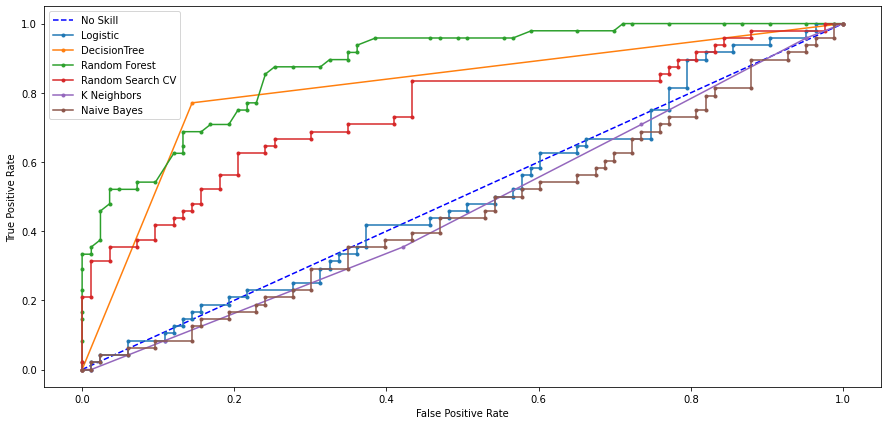

In [77]:
fig = plt.figure(figsize = (15,7))

plt.plot(rp_fpr, rp_tpr, linestyle='--', color='blue', label = 'No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.plot(rs_fpr, rs_tpr, marker='.', label='Random Search CV')
plt.plot(knc_fpr, knc_tpr, marker='.', label='K Neighbors')
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Observations**

- We can see that the AUC of Random Forest ROC is higher than the other algorithms. So, we can proceed using **Random forest** on our unseen data 



<a id = Section15></a>
## **15. Analysis on Unseen data**

- We are given the **Test Set**.

- The Test Set parameters are,

|Id|Parameter Name|Description|
|:--|:--|:--|
|01 | id	               | Unique identifier |
|02 | netural_venue        | Venue of the game. stadium 1: 0 and stadium 2: 1|
|03 | team1                | Team 1 Encoded as Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3|
|04 | team2                | Team 2 Encoded as Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3 |
|05 | toss_winner          | Winner of the toss. Assuming Team is Encoded as Kolkata Superstars : 0 ,Chennai Strikers : 1, Bangalore Royals : 2 , Mumbai Lords : 3 |
|06 | toss_decision        | Decision made by toss winning captain.  0 as Fielding and 1 as Batting | 
|07 | result_margin        | By How many runs the winning team won the match  |
|08 | Day of week            | The day of the week encoded as Sunday:1, Monday:2, Tuesday:3, Wednesday:4, Thursday:5, Friday:6, Saturday:7 |
|09 | Day of the month     | The day of the month |
|10 | Month                | The month of the record. |
|11 | Year                 | The year of the record |

In [78]:
data_test = pd.read_csv("https://raw.githubusercontent.com/naveenmnav/INSAID-DPL-2022/main/Test_Data.csv")

In [79]:
data_test.describe()

,id,neutral_venue,team1,team2,toss_winner,toss_decision,result_margin,Day_of_Week,Day_of_month,Month,Year
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,7.606386e+05,0.121951,0.682927,0.676829,0.615854,0.335366,18.121524,3.926829,16.365854,4.835366,2013.951220
std,3.065091e+05,0.328232,0.741050,0.654723,0.640163,0.473564,22.884391,2.172220,8.593066,1.579304,3.690154
min,3.359840e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2008.000000
25%,5.012358e+05,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,9.000000,4.000000,2011.000000
50%,7.316400e+05,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000,4.000000,16.500000,4.000000,2014.000000
75%,1.082624e+06,0.000000,1.000000,1.000000,1.000000,1.000000,19.000000,6.000000,23.000000,5.000000,2017.000000
max,1.237180e+06,1.000000,3.000000,3.000000,2.000000,1.000000,138.000000,7.000000,31.000000,11.000000,2020.000000


In [80]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             164 non-null    int64  
 1   neutral_venue  164 non-null    int64  
 2   team1          164 non-null    int64  
 3   team2          164 non-null    int64  
 4   toss_winner    164 non-null    int64  
 5   toss_decision  164 non-null    int64  
 6   result_margin  164 non-null    float64
 7   Day_of_Week    164 non-null    int64  
 8   Day_of_month   164 non-null    int64  
 9   Month          164 non-null    int64  
 10  Year           164 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 14.2 KB


In [81]:
data_test.isnull().sum()

id               0
neutral_venue    0
team1            0
team2            0
toss_winner      0
toss_decision    0
result_margin    0
Day_of_Week      0
Day_of_month     0
Month            0
Year             0
dtype: int64

In [82]:
unseen_null_frame = pd.DataFrame(index = data_test.columns.values)
unseen_null_frame['Null Frequency'] = data_test.isnull().sum().values
percent = data_test.isnull().sum().values/dataset.shape[0]
unseen_null_frame['Missing Percentage'] = np.round(percent, decimals = 4) * 100
unseen_null_frame

,Null Frequency,Missing Percentage
id,0,0.0
neutral_venue,0,0.0
team1,0,0.0
team2,0,0.0
toss_winner,0,0.0
toss_decision,0,0.0
result_margin,0,0.0
Day_of_Week,0,0.0
Day_of_month,0,0.0
Month,0,0.0


<a id = Section16></a>
## **16. Random Forest on Unseen Data**

In [83]:
y_pred = rf_clf.predict(data_test)

In [84]:
y_pred

array([1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       2., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 2., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 2., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 2., 0., 1., 0., 1., 1., 0., 0., 1., 0., 2., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 2.,
       1., 0., 1., 0., 2., 1., 1., 0., 0., 0., 1.])

In [85]:
y_pred.shape

(164,)

In [86]:
y_pred_s = pd.Series(y_pred)

In [87]:
y_pred_s

0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
159    1.0
160    0.0
161    0.0
162    0.0
163    1.0
Length: 164, dtype: float64

In [88]:
y_pred_df = pd.DataFrame(y_pred)

In [89]:
data_test['id']

0       501220
1       548359
2      1178424
3       501251
4       980949
        ...   
159     734019
160    1216496
161    1178394
162    1136591
163    1136598
Name: id, Length: 164, dtype: int64

In [90]:
y_pred_df

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
159,1.0
160,0.0
161,0.0
162,0.0


In [91]:
submission = pd.DataFrame({'id':data_test['id'],'winner':y_pred_df[0]})

In [92]:
submission

,id,winner
0,501220,1.0
1,548359,1.0
2,1178424,0.0
3,501251,0.0
4,980949,1.0
...,...,...
159,734019,1.0
160,1216496,0.0
161,1178394,0.0
162,1136591,0.0


In [93]:
submission.to_csv('submission.csv')

In [96]:
uns_rf_probs = rf_clf.predict_proba(data_test)
uns_rf_auc = roc_auc_score(y_test, uns_rf_probs, multi_class = 'ovr')

ValueError: Found input variables with inconsistent numbers of samples: [131, 164]